### Exercise 6

In [1]:
%matplotlib inline
#%matplotlib osx
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
# Midterm is next week
# Lecture 1 - 4
# HW 1-4

### System of Non-Linear Equations.

Consider
$$x^2 + xy = 10$$
$$y + 3 xy^2 = 57$$

1) Write it in the form of
$$u(x,y) = 0$$
$$v(x,y) = 0$$

In [5]:
def u(x, y):
    return x**2 + x*y - 10
def v(x, y):
    return y + 3*x*y**2 - 57

2) Let us visualize it by making 3d plot. Despite looking really cool it doesn't tell much.

Text(0.5, 0.92, 'v(x,y)')

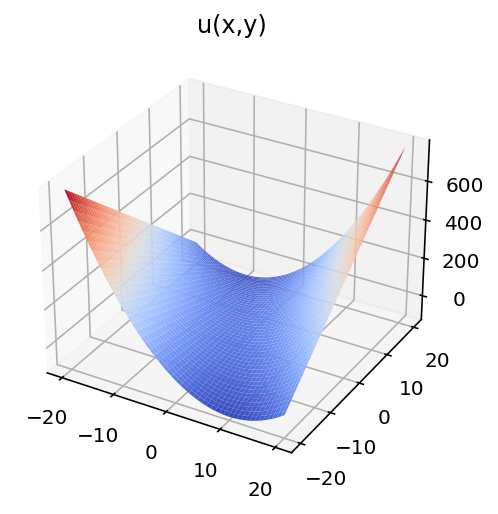

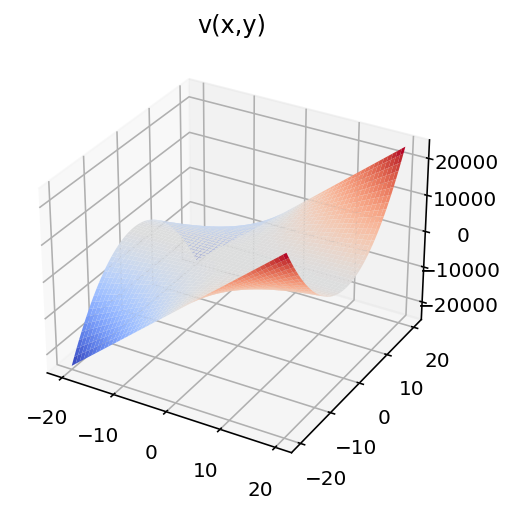

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy) ##<<<<<<And this too.   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

3) Contour plot.

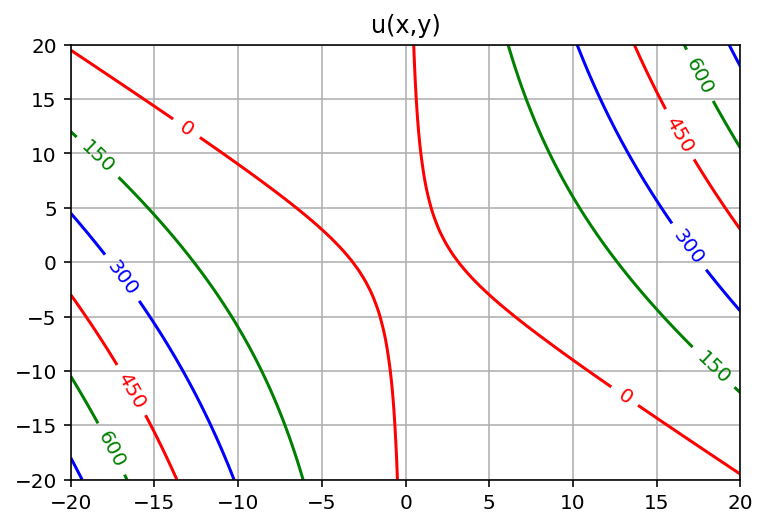

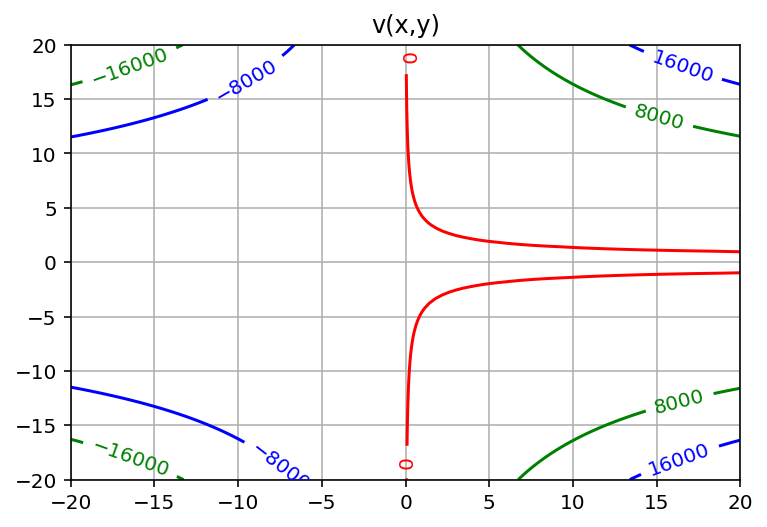

In [7]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 100
ny = 100
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)
 

ucs = plt.contour(x, y, uz, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()

3) Which lines are we interested in?

In [ ]:
u(x,y) = 0
v(x,y) = 0

4)Let's overlay them on top of each other.

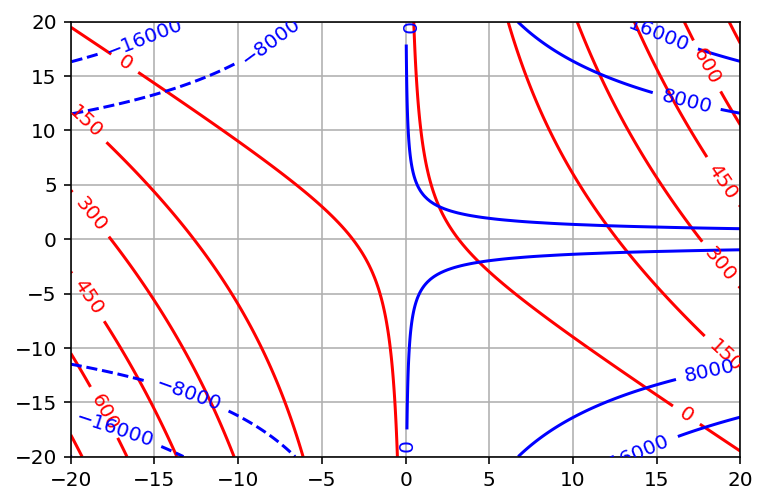

In [8]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

5) Where (approximately) are the solutions to $u(x,y)=0$ and $v(x,y)=0$

In [ ]:
# 4, -2 .... 2, 4

### Newton's Method (>1D)

1) What matrix equation you need to solve to find the next guess ($x_{n+1}, y_{n+1}$)?

2)Where should you start your guess ($x_0, y_0$)?

3) Find ($x_1, y_1$)

In [14]:
(1,2).copy()

AttributeError: 'tuple' object has no attribute 'copy'

4)Find ($x_2, y_2$)

In [15]:
from functools import wraps
def pdiff(f, i, h=0.001):
    # returns partial derivative of f by the i-th argument
    @wraps(f)
    def ret(*arg):
        fwd = list(arg)
        fwd[i] += h
        bwd = list(arg)
        bwd[i] -= h
        return (f(*fwd) - f(*bwd))/(2*h)
    return ret
    
def f(x, y):
    return x**2 + 2*y**2

fx = pdiff(f, 0)
fx(3, 2)

5.999999999998451

5)Write a program to do what you just did and find  $(x_5, y_5)$? Plot to verify. (Just add plt.plot([x],[y])). You may use np.linalg.solve.

In [ ]:
def solve(f, g, x0, y0, n):
    # gimme the x,y s.t. f(x,y) = 0 && g(x,y) = 0

6) Find the other solution.

7) Does it guarantee to converge to the right answer?

8) Implement np.linalg.solve using gaussian elimination.